In [151]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import plot_tree
import pickle

In [152]:
results = pd.read_csv('test-log.csv')

In [153]:
results

,prune_v0,prune_v1,prune_v2,prune_v3,prune_v4,prune_v5,prune_v6,prune_v7,prune_v8,prune_v9,prune_v10,prune_v11,mean_class_acc
0,0.28,0.22,0.34,0.50,0.70,0.04,0.12,0.44,0.28,0.34,0.22,0.26,0.881212
1,0.48,0.62,0.48,0.90,0.44,0.50,0.18,0.62,0.68,0.40,0.88,0.74,0.813939
2,0.46,0.34,0.16,0.58,0.74,0.58,0.60,0.28,0.16,0.28,0.70,0.72,0.852424
3,0.24,0.24,0.24,0.80,0.94,0.48,0.30,0.56,0.64,0.98,0.70,0.60,0.833636
4,0.66,0.12,0.28,0.34,0.20,0.82,0.76,0.60,0.74,0.34,0.08,0.94,0.823636
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5660,0.98,0.68,0.20,0.06,0.44,0.28,0.96,0.96,0.82,0.94,0.10,0.48,0.843030
5661,0.58,0.70,0.70,0.40,0.46,0.16,0.28,0.78,0.20,0.14,0.20,0.54,0.865758
5662,0.20,0.16,0.28,0.24,0.44,0.96,0.60,0.92,0.82,0.48,0.04,0.86,0.855152
5663,0.30,0.94,0.64,0.78,0.90,0.50,0.56,0.70,0.60,0.54,0.22,0.42,0.860303


In [154]:
for view in range(0, 12):
    print(f"View {view} mean: {results[f'prune_v{view}'].mean()}")

View 0 mean: 0.5003283318623125
View 1 mean: 0.49966460723742273
View 2 mean: 0.4957352162400706
View 3 mean: 0.499053839364519
View 4 mean: 0.5013309796999117
View 5 mean: 0.49877493380406007
View 6 mean: 0.49850308914386576
View 7 mean: 0.4983406884377758
View 8 mean: 0.500098852603707
View 9 mean: 0.5020759046778464
View 10 mean: 0.5005472197705209
View 11 mean: 0.509270962047661


In [155]:
X = results.iloc[:, :-1].values
Y = results.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [156]:
[X.shape, Y.shape], [X_train.shape, y_train.shape], [X_test.shape, y_test.shape]

([(5665, 12), (5665,)], [(4532, 12), (4532,)], [(1133, 12), (1133,)])

In [157]:
model = XGBRegressor(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    tree_method='hist'
)

In [158]:
model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [159]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [160]:
y_pred = model.predict(X_test)

In [161]:
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print(f"Accuracy: {model.score(X_test, y_test)*100:.2f}%")

R² Score: 0.955857860199577
MSE: 0.003197123084622168
Accuracy: 95.59%


In [162]:
importance = model.feature_importances_

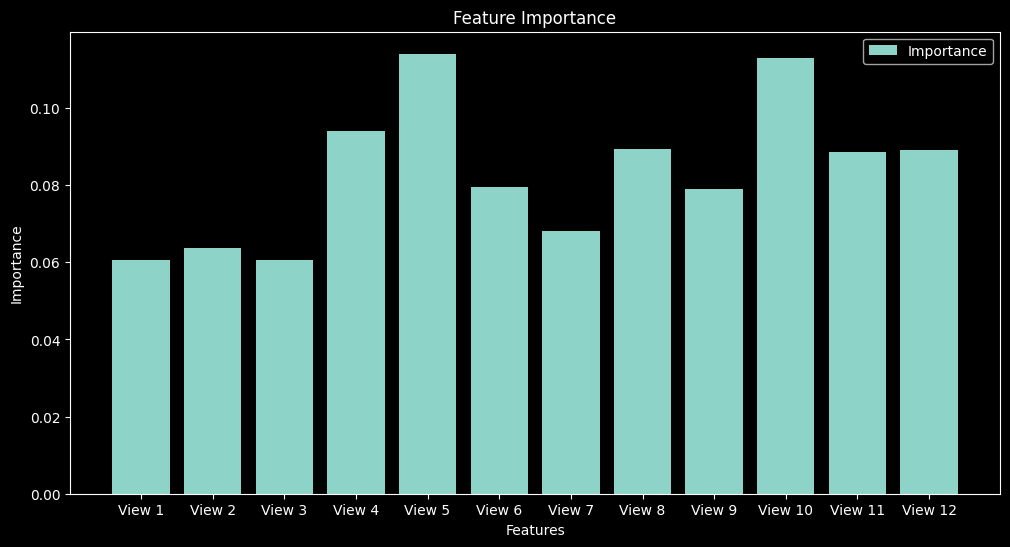

In [163]:
plt.figure(figsize=(12, 6))
plt.bar(range(len(importance)), importance, tick_label=[f'View {i+1}' for i in range(len(importance))])
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.legend(['Importance'])
plt.show()

In [164]:
input_data = [[1.0]*12]

In [165]:
model.predict(input_data)

array([0.33446035], dtype=float32)

<Figure size 1000x600 with 0 Axes>

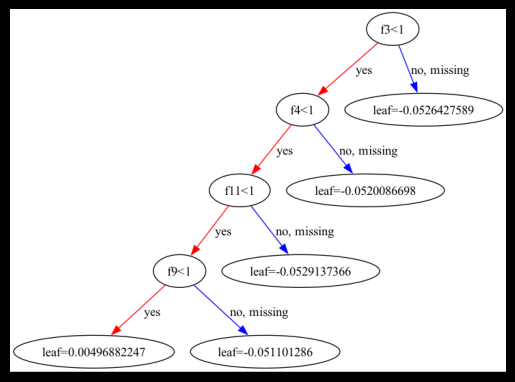

In [166]:
plt.figure(figsize=(10, 6))
plot_tree(model, rankdir='TD')
plt.show()

In [167]:
print("\n".join([model.get_booster().get_dump()[i] for i in range(20)]))

0:[f3<1] yes=1,no=2,missing=2
	1:[f4<1] yes=3,no=4,missing=4
		3:[f11<1] yes=5,no=6,missing=6
			5:[f9<1] yes=7,no=8,missing=8
				7:leaf=0.00496882247
				8:leaf=-0.051101286
			6:leaf=-0.0529137366
		4:leaf=-0.0520086698
	2:leaf=-0.0526427589

0:[f10<1] yes=1,no=2,missing=2
	1:[f8<1] yes=3,no=4,missing=4
		3:[f2<1] yes=5,no=6,missing=6
			5:[f7<1] yes=7,no=8,missing=8
				7:leaf=0.0047013429
				8:leaf=-0.0518413298
			6:leaf=-0.0510166101
		4:leaf=-0.0519811325
	2:leaf=-0.0525993891

0:[f3<1] yes=1,no=2,missing=2
	1:[f10<1] yes=3,no=4,missing=4
		3:[f4<1] yes=5,no=6,missing=6
			5:[f5<1] yes=7,no=8,missing=8
				7:leaf=0.00439815223
				8:leaf=-0.0530217178
			6:leaf=-0.0474459566
		4:leaf=-0.0472176597
	2:leaf=-0.0476181209

0:[f11<1] yes=1,no=2,missing=2
	1:[f6<1] yes=3,no=4,missing=4
		3:[f0<1] yes=5,no=6,missing=6
			5:[f10<1] yes=7,no=8,missing=8
				7:leaf=0.00403958093
				8:leaf=-0.0425969921
			6:leaf=-0.0523929261
		4:leaf=-0.0513413213
	2:leaf=-0.0485507958

0:[f8<1] yes=

In [168]:
with open('xgboost_model.pkl', 'wb') as f:
    pickle.dump(model, f)